In [35]:
import numpy as np
import librosa, librosa.display
import matplotlib.pyplot as plt

In [36]:
FIG_SIZE = (15,10)
file = "blues.00000.wav"

In [37]:
signal, sample_rate = librosa.load(file, sr=22050)

Text(0.5, 1.0, 'Waveform')

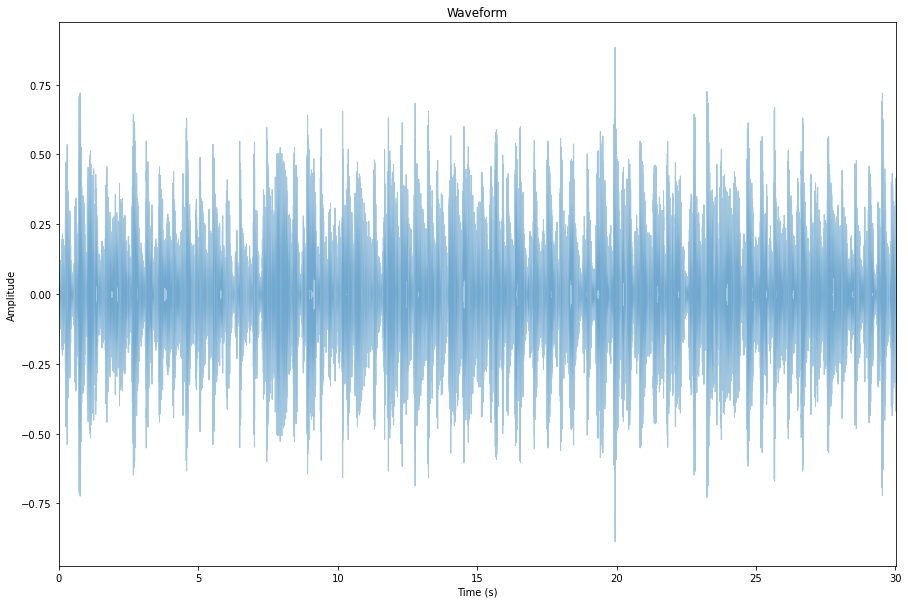

In [38]:
plt.figure(figsize=FIG_SIZE)
librosa.display.waveplot(signal, sample_rate, alpha=0.4)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")

In [39]:
fft = np.fft.fft(signal)
#We expect to have as many complex value as Samples

Text(0.5, 1.0, 'Power spectrum')

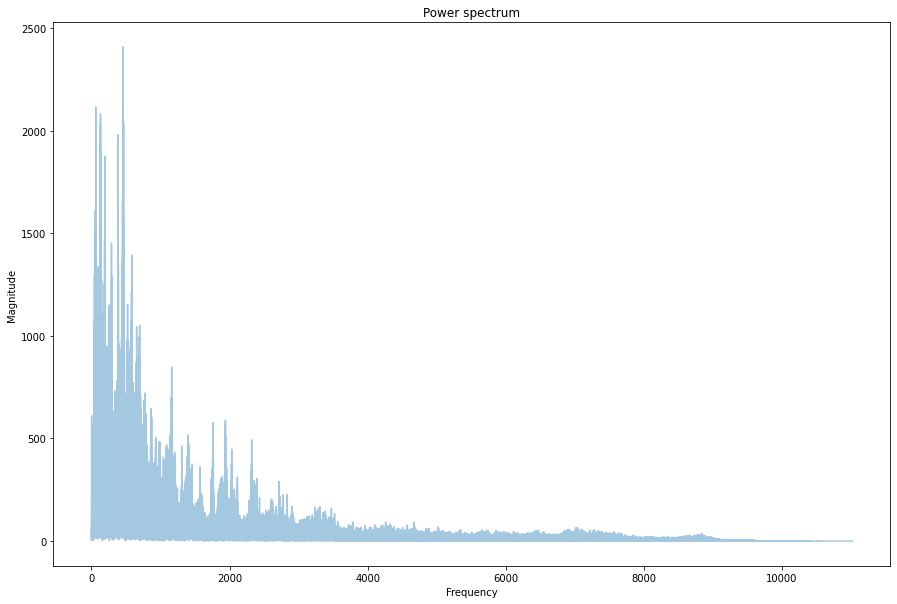

In [40]:
spectrum = np.abs(fft)
f = np.linspace(0, sample_rate, len(spectrum))
left_spectrum = spectrum[:int(len(spectrum)/2)]
left_f = f[:int(len(spectrum)/2)]
plt.figure(figsize=FIG_SIZE)
plt.plot(left_f, left_spectrum, alpha=0.4)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [41]:
hop_length = 512 
n_fft = 204
#Sliding window
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate
print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.00925170068027211s


Text(0.5, 1.0, 'Spectrogram')

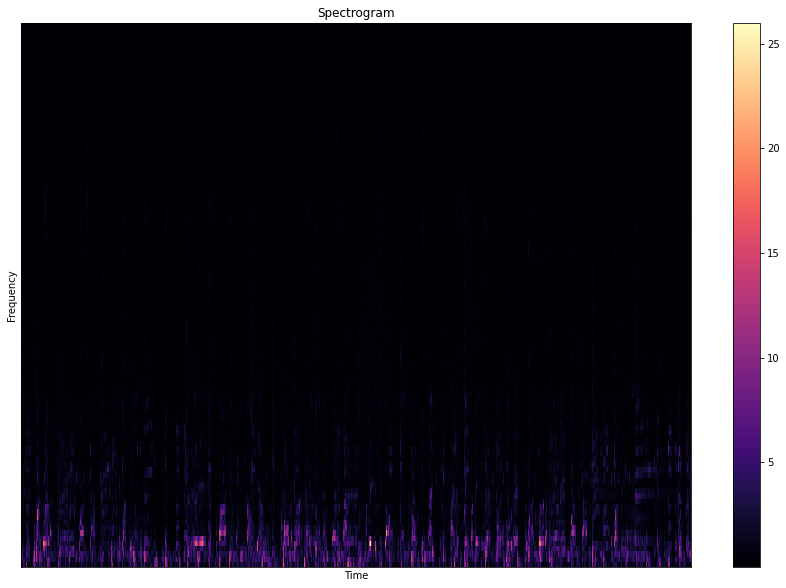

In [42]:
stft = librosa.stft(signal, n_fft=n_fft, hop_length=hop_length)
spectrogram = np.abs(stft) #only need the magnitude
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.title("Spectrogram")

Text(0.5, 1.0, 'Spectrogram (dB)')

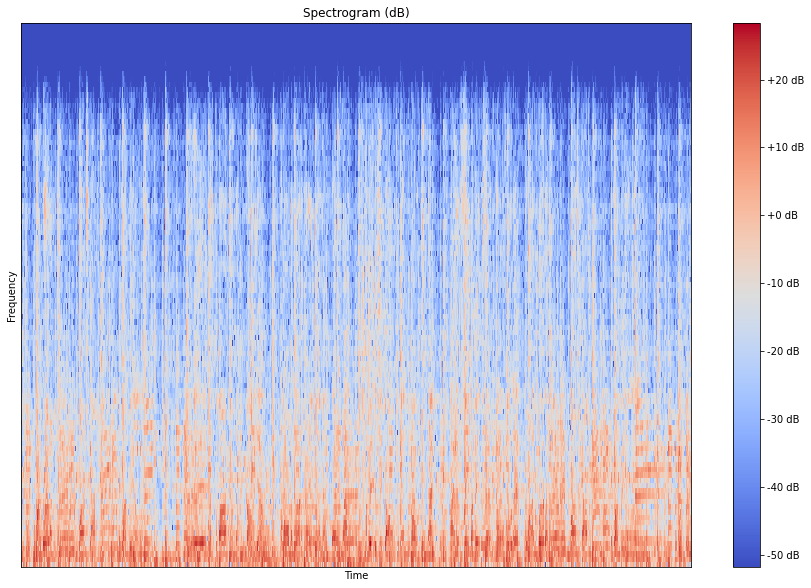

In [21]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

/usr/local/lib/python3.6/dist-packages/librosa/filters.py:284: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn('Empty filters detected in mel frequency basis. '


Text(0.5, 1.0, 'MFCCs')

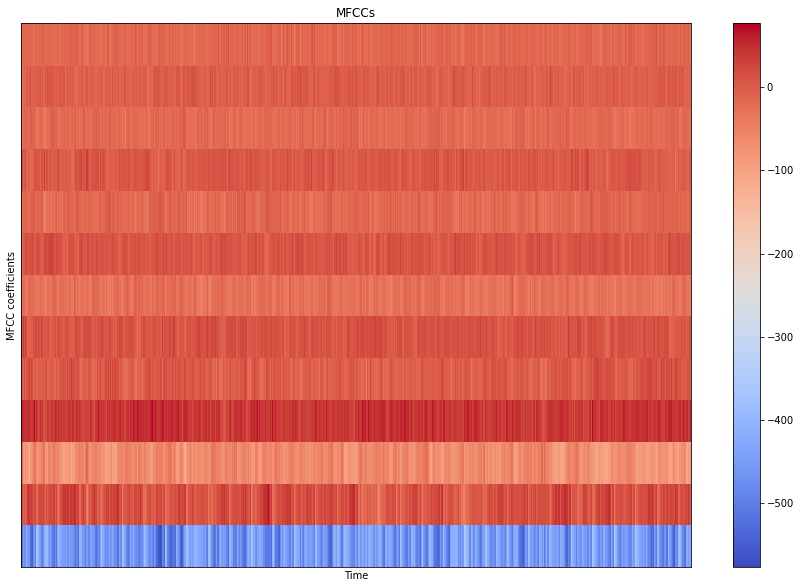

In [22]:
MFCCs = librosa.feature.mfcc(signal, sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=13)
plt.figure(figsize=FIG_SIZE)
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.title("MFCCs")